# New York City Taxi Fare Prediction

The task is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.  While I can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used. The challenge is to do better than this using Machine Learning techniques!

All datasets and the task itself were taken from the Kaggle playground competition, I do not own any of them.

## New York City Taxi Fare Prediction Analysis


First we need to look at the data:

In [1]:
# load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')



In [5]:
# read training data with limiting to the rows, as the file is big

tax_train = pd.read_csv("train.csv", nrows = 2_000)

#and checking what columns the data table hasre
tax_train.columns.to_list()

['key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [16]:
# i can also check how the table would look like and get the shape of the dataframe
print(tax_train.shape)
tax_train.head()

(2000, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
1,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00-73.982738,40.761270,-73.991242,40.750562,2.000000,NaN
2,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42-73.98713,40.733143,-73.991567,40.758092,1.000000,NaN
3,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00-73.968095,40.768008,-73.956655,40.783762,1.000000,NaN
4,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45-74.000964,40.731630,-73.972892,40.758233,1.000000,NaN


In [24]:
# check datatypes
tax_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [25]:
# check statistics of the features
tax_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1.0
mean,11.489370,39.858843,-72.400140,39.858379,1.623391,1.0
std,10.517487,6.312888,10.786066,6.312538,1.506759,NaN
min,2.500000,-74.016048,-74.429332,-73.979268,0.000000,1.0
25%,6.000000,40.734686,-73.991436,40.733395,1.000000,1.0
50%,8.500000,40.753407,-73.980335,40.753433,1.000000,1.0
75%,12.900000,40.767793,-73.963216,40.767510,2.000000,1.0
max,180.000000,41.366138,40.711303,41.032598,40.782004,1.0


In [ ]:
No negative `fair_amount`, 

Then I take a look into the test set to see how the columns look like there

In [17]:
# Read test data

tax_test = pd.read_csv("test.csv", nrows = 2_000)

#and checking what columns the data table has
tax_test.columns.to_list()

['key',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [21]:
tax_train.isnull().any()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count       True
dtype: bool

As I can see there is no `fare_amount` column, as I need to predict that column. The rest of the columns are in place.

After looking at the data, I need to determine a problem. I need to determine a model, to understand what kind of Machine Learning model to use.

I start with creating a histogramm of the data:

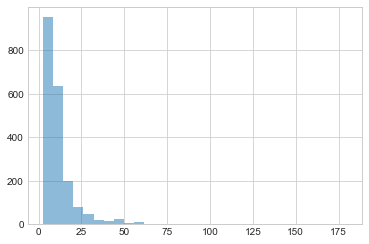

In [18]:
# Plot a histogram
tax_train.fare_amount.hist(bins=30, alpha=0.5)
plt.show()

From histogram I can see, that the `fare_amount` is a contionous variable, therefore I am dealing with the regression problem.

In [19]:
from sklearn.linear_model import LinearRegression


# Creating a LinearRegression object
lr = LinearRegression() 


I take some features in the train set and build a linear regression

In [22]:
# Fit the model on the train data

lr.fit(X=tax_train[['pickup_longitude',  'pickup_latitude',  'dropoff_longitude',  'dropoff_latitude',  'passenger_count']],
        y=tax_train['fare_amount'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').